In [1]:
import randomwalk as rw
import numpy as np
import matplotlib.pyplot as plt

# CW10 : Monte Carlo Techniques

The word "Monte Carlo" is a fancy term for what essentially means "using random numbers." Since computers are good at generating (pseudo)random numbers quickly, it can be advantageous to use this randomness for simulations. In this notebook, you will explore a few interesting examples of this idea.

## Estimating $\pi$
As a simple example, consider the following technique for computing the number $\pi$:
  - Area of a unit circle : $\pi$
  - Area of a the minimum box that fits the unit circle, with side length 2 : $4$
  - Fraction of area of the box taken up by the unit circle: $\pi/4$
  - Therefore: If one finds the fraction of random points that uniformly cover such a box that fall inside the unit circle, then multiplying this fraction by 4 will yield $\pi$.

Let's test this idea:

In [2]:
def estimate_pi(N=100000):
    # Generate N random x and y coordinates within the box with sides from [-2,2]
    xs = np.random.uniform(-1,1,N)
    ys = np.random.uniform(-1,1,N)
    # Count how many points lie within the unit circle
    circle = np.where(xs**2 + ys**2 < 1, 1, 0).sum()
    # Compute pi
    return 4 * circle / N

In [3]:
for N in [10, 100, 1000, 10000, 100000, 1000000, 10000000]:
    print("N=",N, " : pi=", estimate_pi(N))

N= 10  : pi= 3.2
N= 100  : pi= 3.44
N= 1000  : pi= 3.248
N= 10000  : pi= 3.118
N= 100000  : pi= 3.1482
N= 1000000  : pi= 3.139508


N= 10000000  : pi= 3.140512


Not bad for such a simple idea!

## Integrating a Function

Consider the following definition for integrating a function $f(x)$ between $x\in[a,b]$:

In [4]:
def estimate_integral(f,a,b,N=100000):
    xs = np.random.uniform(a,b,N)
    return f(xs).sum() * (b-a)/N

What does this do? It generates $N$ randomly chosen points $x_i$ in the range $[a,b]$, then finds the average function value of all those points $\bar{f} = \sum_{i=1}^N f(x_i)/N$, then multiplies this average value by the interval length to find the area: $A = \bar{f}*(b-a)$. This method relies upon the theorem in calculus that the integral is equal to the average value of the function over a domain times the domain itself (essentially approximating the whole integral as one big rectangle). Let's see how well it works in practice.

Recall that $\int_0^{2\pi}\sin(x)dx = 0$. Let's try to compute that using Monte Carlo methods:

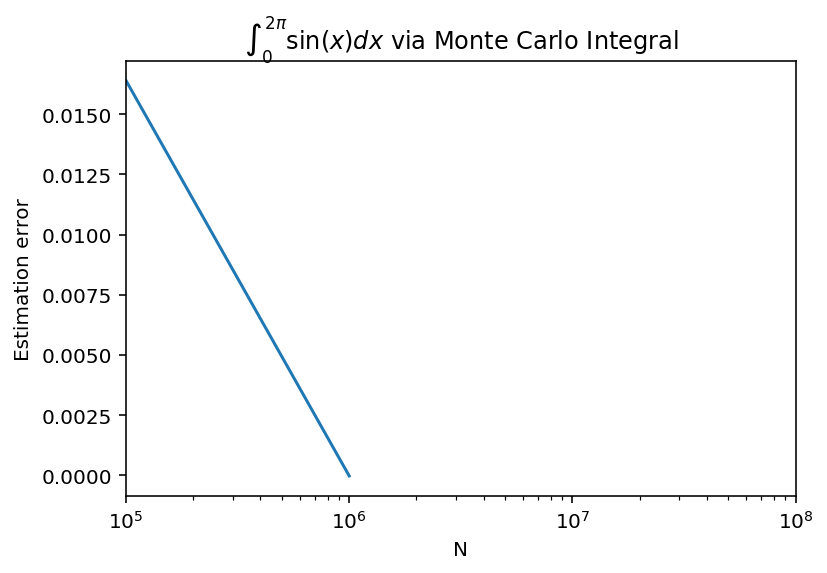

In [5]:
Ns = [10**i for i in range(5,7)]
Is = [estimate_integral(np.sin, 0, 2*np.pi, n) for n in Ns]
plt.semilogx(Ns,Is)
plt.title(r"$\int_0^{2\pi}\sin(x)dx$ via Monte Carlo Integral")
plt.xlabel("N")
plt.ylabel("Estimation error")
plt.xlim(10**5,10**8)
plt.show()

It does in fact converge eventually. Though this method is vastly less efficient than the trapezoid rule we have been using deterministically in 1D, it turns out that for higher dimensional integrals (like 10D) this stochastic technique can substantially outperform similar deterministic strategies.

## Random Walks

Where Monte Carlo methods really shine is in approximating behavior that is common in thermodynamics. For example, the air molecules in a room collide with each other constantly, effective jostling each other into random bits of short motion between collisions. Similarly, the molecules in a solid like a table vibrate and randomly exchange packets of energy as they essentially bump into each other - these packets of energy flow through the solid in the form of heat.

If we don't care much about the details of the motion, but want to capture the overall effects of the random jostling, we can simulate random walks of particles.

As a simple example, the following code places 100 particles at the origin of a 2D plane, then has them randomly walk around by taking integer steps in one of the four cardinal directions (E, W, N, S). The resulting animation shows their motion over time.

In [6]:
g = rw.walk_gen(walkers=100)

In [7]:
rw.plot_anim(g, xlim=(-50,50), ylim=(-50,50), max_frames=200)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAGfYG1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTQ4IHIyNjQzIDVjNjU3MDQgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE1IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NiBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAW+ZYiE
AC///vau/MsrRwuVLh1Ze7NR8uhJcv2IMH1oAAADAADVaeUGUpNWI76AABz4tcIk0/+ABm3j9oV6
Lv8CH9ZNlJ4hBOHoxhzEuhJFSsRKyJK6+v78by4F/2PPY98Auknv/z4VH6zWkxwoF3cTY2mf2Yf2
zIUqL1ry6RkmhbJZFwv1SlU78uOoWDZivHPVKzFOmoQbsQb1oEFDGW71FW/lWKEFG7kJSYNk/+K2
E2PXmrIwkEkCFYIOko0W5+7jXQbprtqmFVcgACEqCBleZ0s9YAeAbnjANb1PxiHqTVXDzCL+F/2o
QNFIIrH04/ZV8BuE8bSCsPA33dFiix0FA8w6SySAWh5HwS2wndme2wjFdL4ZgJ0Q+6+T6UKfj24S
tsOu535boh+qEiGJ+oIW+CBi0wlO83dnhAmX8+txjtklf3i8GVGgccCWTa8WahO+twR5ftU7Qa9U
gIYL68QXXsnXKt4RYs47i0p4IuR4bd1a5FampJ3V0L3fJMxcsPaPfKoA8XFroUqUSX3oMuhK+ovG
8lLDrMdLs3ROFGtxOY05xlFPjZcpJNY6OS3V5EGMYPVVQBddOZogJy7hItwRhJJP8THjcDp10mAF
19qnAT7nXFE8Xd90dLkMTN9BZ2fuCYGrW43ER3yI9ayihS8YhS7NWZjq6HXmJsBMXmCON27M6dtj
eHlER5/vTCwpVYAAoKmMqJsyxBBAvn1nwOdx0lLUhG8bo2Rhq9uuQIi7us/tLyZYMdfxmFq/E35j
BbG6rIZ+eWSAWPDYzeKxAesnQKEqXSNCpUN2mSXr6gRO5vsKdUsziielTuZny1tKBx7OGvoWNwSe
Ry4bkuphHc6rTQL/UJ7B1+34NiflYBxmCOAKlKyzdGWaWWOii8zu97ly3pulTsjqkMfYuKKm+apw
SgACkAAIGNhStiiAn6rRGYaYIGVry/+Da7hvOmDh5mCNB7fEX5VsmUaYqhkVXDD85Qb2ge6F1ycG
Z7O18m072HhDoqOStvCA3W+Sl+DZlUPsQv0c49bMryA+A+GNUXJwDdfLS+lhdrqPWqNWn13uU/dD
wCaNLCtIZkee4QYNNbAWudL3ii88LTY/9BXAD52A3btQZbFI5LvcS6FNiDyZ4vrTXHYdAFL5rd4L
oox//YKKhcVVh+nVJTN6ETOjEktgR4wFr6sX4HRovCmeybOy8glXsLqEx8cyGDs4Nrvlmiye2lEG
NOqU7V0kVj12VAqVoFSxyeA4UaK892ySuvyfGK477iCPvjItNA5u7FayexfOmgTN+rflac5nYuNW
fCsv/GaebfjAJr9dJ3wKjibFWqoePK2oL5h7WHN9goYOMZP84SPkJIGe14o1dAFAH3vet+ZmpHz3
K0eNMTzQOaZGH3OjH3CCt6dbZyscnlnO9aJHweuoBouMdllMHLawzxEHZk9ab2qkvXuqftk0K3XH
saRyn+Yc/E7H2UCupo+XvO+aQOjn2FhFZm+vqdaC4/rFoI82gIVRNyASMn86873qz6oDVrL1vUxp
dyiCPSB2jBnsJh4mAQfDLmA8lWgRcItikWsGL2zmtLvpVcMT5kXGqcvcAp3cEYLOAKdSQN+9iM8X
9jx527/anvpJVLcoph3d4qA7QZhFZ846TrcJioNMGHDtzKOpp4PD2e1H9tBM7wpTTEuOKTxeDRyd
oX02qGZCbtpC8kxKIk5uc8I8hMHxlhfloHOh+R4mhd/r0ov/VNh91lqQuhKLhtIvLUzsKtctRSKQ
9/Pzse4CnT1uQN+Ce5sXRmnpJddrg2Sye1Xw4XuMMBf/XC+o8yC60gXT4xhtVKdWBy5gILEMdeOo
WipzsDJSgKwkG9zRtZAgJXKtI8LhzyIRfNilfeh5EQB6e+KCm3PiU8wp3Fo4ZQKO6Ur/A9ZZAziE
bL9QUvEw8+X++lxad5LQtpZyu6jUav8UYxYdPnMq+7Ht+KBqDkVTymnBAAAA4UGaIWxDP/6eEGds
dzplel6qwgWgEwymrfMKSvz7XfylJ6lz7YpXccd00TgZT2mtrP2amFIyg+aReVROlV6h5WvHA8ZF
CixFF8+2qZeLXTjP15eFjzert3GGM6hxVII/hbLfPiMmi5Lx4T0Gf/r2fqsjKg3bXulXRkq9zxkF
urjDp/JwAQfWYJTb8ZTqLc5DrJ72FrwDSxfAx+8YDNr7err6YtAxxQlijxk7CKGatV/FMIUWwwVj
oktPpSmRfg+DnhK0XkKIK15aMMVXorv6mgYDv+TMfNBy02LRNf8PqyxP4gAAARtBmkU8IZMphDP/
/p4Qf+LHPMMHyhNMtMhAWSec4AACX42i0j6WbXUurMf0xBTLAUiq/UAAjI4CT8H4CipVfTFK5Uac
EnZgVFBIvlA3EsdkUyLkadwrAoyFFmda7LIW/fFnZ8bz4tMO5gnGoTWpEhng7otcUbNZjjieriEN
0OReCPE67x806A2uYK2wTfwTGVZlBBf/MPinFoWwCSV1Xaq1YxNWCsFF1cjAAJU3fzVoVmsdipXv
Kr5TbYzetrhioihi7ib29ZTugR6fSoZw37374Gpubm3b3g3j7uOZdUvGGdhuziBc5YlYJVTadP9F
NG35lzAoPzywpPpEcdy6odGi2KyIQw2QboxdTUUNG2G7rSD9XTgAgxEQmvdfAAAAdkGeY2pTwj8C
hPKwcr9uaBUwdSAANY1qlUNwD1YAfIx4AH4etmu59kZrsU0XRZkSQxwr7bUcrb21yupHjnzWzi+s
Bpas7HN2pTyVEh+ahvbGYPeMfqzMzeFz6bjLQDF90qTZ1WDNTvNm6Edlz3AsW7SCBIcfmcAAAABW
AZ6CdEf/B+dxR5OsSsydqaUAAAMAHaWqZYPiTyRL7dm1ABOtyoP05pLXrImNX+dDaU6UBX0Zgtvq
rXn1s4pimbsa+US5ZJDPe

## Exercise

Create a new random walk generator that prevents the particles from passing through a box with walls at $x=-20,20$ and $y=-20,20$.  To make things interesting, place a hole in your box at $x=20$ for the range $y\in[-4,4]$ such that particles can wander freely in that region of the hole as before.  Make sure particles outside the box and inside the box cannot move through the box walls, but otherwise move freely.  Modify the animation function so that the initialization frame draws the boundaries of your box in addition to the particles.

In [8]:
g2 = rw.new_walk_gen(walkers=100)

In [9]:
rw.new_plot_anim(g2, xlim=(-50,50), ylim=(-50,50), max_frames=200)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAGXzW1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTQ4IHIyNjQzIDVjNjU3MDQgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE1IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NiBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAZKZYiE
ADP//vbsvgU1/Z/QlxEsxdpKcD4qpICAdzTAAAADAAB4HShe6DhKq9DAABvIzcIk3f+ABLO++E67
pBhendidMhig5WmV6h73lqDj7Mh1OsrP9f35GBGKX23n8bzqT7oTWwNaVDGHQZS1Tk42Zt8BMtTD
twpUXrXmNVJNC2SyLhfqlPF65cdQsGzFpMNaBJESVb8QxBvWgQUMZbvilb+VYoQUbuQlR0ET/4rY
TY9eXMjCwRyIVgg6Sj6hr7uNdBumu2p7hDRQAEnUEDh87papwAmwgxaOFP1Hx1s/P4JY1Mn2//A0
soxfSsfTj9lXwG4TxtIKw8Dfd0WKLHQUDzDpLJIBgNnDim7CXJ57bCMV0vhmAnRD7r5PpQp+PbhK
2w67nflvWH6oVE8n6ghcpm9FjRt8pG8if99hE4DA8etUgeNM/GoTg/s00RyBBOQwXE7Rygg8q0sj
4EWnhwrQ/VlP1i9+Dbuz+3DfcQG/M0FvmUraEa97CAHl33rvMBYuPGyNjH3PImh4hIb/vSW+gjE6
FiP/oD5K0dyjRnJVSetJybovpMwSJaRUC3YBGUEug2prbCcEtTUk7+DUBJnt8KO957qV31tBZoGq
mNU7jUY3FruR7gb9Q6FYV6fzIO9ef/mYZm28pvYlbSytgOnKgDx8slSU3SnOmk7g77ZNeYcsWt6e
xWi2a5d8/GvoN79M8TnSyhMamayRk1MzUIca+QLEb1SVV5+8u5PFfcQvrVwMJxsrJz7EbZ5vr/7K
iGlGSx5jCQ6TDmo50SsXdlR22GibcB6mK2xmZ6xWgdy47K8IVjyc6yWVQBCGoYWCkWEgtEEnfDhI
F4EOFuHZ+PQ81NT2sAncASsL4Q32FjT+PwEs8HNqa+wUS7eD//hs2Sy+qJaVdbswM+xcHfpNX42Z
C0kY4Sc0Ja1PWvxrLvnmmSLa/8HTPqZdYcLj3jVAxFkQjiielCAAuUh3tvo7N0pfTohqU8HVsDKY
aEarexxU2m3TfQPvMlSBKcP1AFsBN7fh06IQSlsJY16Ba686UpVqYvNqSeL875FvjcisboydRT9j
2OHJCwKewkfOIBMhaa9fEbS2wNRVEnv3mANpHg9eOB6UfRGPBElILQAtXYECZZDuhO6Kn2c5OUf5
GZD/UFb5mTQUM6l9DOz1LgiVlLDX3Djfi3sYsBYWjJfiHscQDp7QxXXvBIeWZ5L0hgjd9EmjigsS
QX//RMzBsQryC9t9QbZRcFZcA3Xy0mqy2isBHxMvXFyLcn3SATJeBLjwolVvogwZG35CzpnvFF54
NAEPpJZTpAU0LmW+N+g0ovKjBB6SMpcQ81u8F0UZCINKlJt0sw/Tqkpm7mQmTpB9eorAtfVi/A6M
/qOwlIdl00qr2F1CY+OZC3qOmgkYMtUBr6IMadUY0LMwDOn6N9P881f3aWO1R0SGbcPnC/J8Yrdi
3IqGPjcTQObuxWjwBvAANoAYIeyXjsXGrPyXRjxmnm4Fd7XR8rBqnUa+RH+qh48ragvlVRyWZUjj
3SzFrXjdnISQM9rw74BBT+89dTRi3FJJHuVo9K5Ocgc0yMPuGJsuEFb062zlYl76U71okfB66hpS
qoBxu7YMLhEgYQIvNEKPiS9e6pLM3IE9cexpHKf5h4ATsfZQK6qKdrBzvgqvq/uCjOq1S6K+VMeE
Oj+CHkVm8+fQhQsQxcwIAREs9V5Anx+eoqR0c1K6/KRrAkTi0U+hAmYSC/USDANRAi2kGYvbOa0u
4i1wxPmRcapy9v46nq57nX1lRFt9xVofkGTmBTbusybZNQytvrGHd3ioDtBmhenzjpOtwmKg0wWC
O50m2uJzsbpqe6Ia41vClM4mK3viXkNHZt/FJ7vvbsgJw+2fz01dKNzuV5CYPjLC/QxfbWL3iaF3
+vSi/9xDPm02Zw7YOJP4BICr+5Vsr6mzSG5z87HuAp09bkDK7JS2EfaMbJLxQwGyWT2q+HC98F/a
PJbX1HmKvF1QTgmJqzaMwHJE8BBYhjrx2z4mODpApulaFz98XtZItvQSJ/rN6WlPFd62KV96HkRA
JlTCoKbc+JTzB/EWjhlAo7pSvXEx3ucFQjZfpwhYmHny/30uJTvJaFtLOV3UaoL/eDGLDpNPpfBo
JlQADNbaDkKODNMAAAFxQZokbEM//p4QZ2x3OmV6XqrCBaATDKat8wpK/Ptd/KUnqXPtildxx3TR
OBlPaa2s/ZqYUjKD5pF5VE73h4L+ydP1ZiGqmdN2i+fbVMvFrpxoiifEACp2R5HtUYriuuyjEaLZ
SOncN96wmfkedxucrzC9j22mI3+PHjrCckU8SYBdrjDn5LhmdkXKPu/r50Z1Jqr7oE7v0Js3UCvO
Jwoq+PH0FEsbDIYFdaKXVQF+RIDjLTcD5ns5GMOFVRtu4qMMlDxkDwQ+weUfuUiFdqWEbPqU/Q2c
QYmvo5rL+THDCVgB6o1dyi6MPh71pN87xG2uwMB8PeR/XQTZpXOBPknt0gYpckZTTeD/1yQghfZu
uI1oxhNlgUguKGPHjbr8gBefZdiIcB9IWuV6MQRWsM9FCVSQ17qiMs5lwfw8vPKWp78BXozIffgY
qrR2X/h8kKbeX4on6IGBpaY3H6wUruFsTiHRffQGWWBloV5WpaLL6uRgAAAAoEGeQniEfwR9111q
W26kSvkLWHi+C8zYMZhxSKwNOlgEb2odzzDJyDzzB/rSbzGbHvYgVOuqVQqqM/mxFNBTbNtjN78l
QAtlclYa+RkhE5c+O8VHtujhk9WG60jnjTGAdqOWUDY03SjNMQQWHmp2s5qm2EI0gglhG1bAziAU
eOrYSakOyQzb01ZL/DEXlyNGHLSFVGgWi/UtLzhFq73wvNEAAABUAZ5hdEf/B+vMQeRaLy/7AAAD
AABtEnaplmkGvGhbineVT